In [1]:
import pandas as pd
import seaborn as sns
import os
from datetime import datetime
from analysis_helpers.intercept_helpers import combine_dfs, convert_np_array, get_cert_valid_columns
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = "/mnt/chaseproject/uva/kd5eyn/ca_data/securly/"
files = os.listdir(BASE_PATH)
dfs = []

In [3]:
files = os.listdir(BASE_PATH)

In [4]:
files

['anon.ssl_20220401_0900-0930-0400.log_ca.parquet',
 'anon.ssl_20220415_2030-2100-0400.log_ca.parquet',
 'anon.ssl_20220415_0830-0900-0400.log_ca.parquet',
 'anon.ssl_20220401_1230-1300-0400.log_ca.parquet',
 'anon.ssl_20220415_0030-0100-0400.log_ca.parquet',
 'anon.ssl_20220415_1800-1830-0400.log_ca.parquet']

In [5]:
for file in files:
    df = pd.read_parquet(BASE_PATH + file)
    dfs.append(df)

# for i, df in enumerate(dfs_new):
#     df.drop(columns=["client_cert_chain_fps", "cert_chain_fps"], inplace=True)
    
# for i, df in enumerate(dfs_old):
#     df.drop(columns=["cert_chain_fuids", "client_cert_chain_fuids"], inplace=True)

base_df = dfs[0]
# base_df_new = dfs_new[0]

for df in dfs[1:]:
    base_df = pd.concat([base_df, df])  
    
# for df in dfs_new[1:]:
#     base_df = pd.concat([base_df, df])        

In [6]:
base_df

,cert_id,_lpp_ver,anon_orig,anon_resp,cert_chain_fuids,cipher,client_cert_chain_fuids,client_issuer,client_subject,curve,...,certificate_serial,certificate_sig_alg,certificate_subject,certificate_version,san_dns,san_email,san_ip,san_uri,issuer_O,domain
0,FQ1stT3RDkQ9e8Cd92,1.11-7,uva,none,"[FQ1stT3RDkQ9e8Cd92, Fa8mvWeCDPFCaNaa4]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,2F27045A49E7C43E,sha256WithRSAEncryption,CN=www.facebook.com,3,"[www.facebook.com, *.facebook.com]",None,None,None,Securly,www.facebook.com
1,FkjPQEE0GZwnYyrlf,1.11-7,uva,none,"[FkjPQEE0GZwnYyrlf, FBT65ZhtqxDlrwLHf]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,2F27045A49E7C43E,sha256WithRSAEncryption,CN=www.facebook.com,3,"[www.facebook.com, *.facebook.com]",None,None,None,Securly,www.facebook.com
2,FggQFm3IH40ZDqXV6k,1.11-7,uva,none,"[FggQFm3IH40ZDqXV6k, FyN45uwHEgPhGF1P8]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,2F27045A49E7C43E,sha256WithRSAEncryption,CN=www.facebook.com,3,"[www.facebook.com, *.facebook.com]",None,None,None,Securly,www.facebook.com
3,F8gTlV3utrllW1Lkgf,1.11-7,uva,none,"[F8gTlV3utrllW1Lkgf, Fsq8Lt1oNgfQccDhKk]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,2F27045A49E7C43E,sha256WithRSAEncryption,CN=www.facebook.com,3,"[www.facebook.com, *.facebook.com]",None,None,None,Securly,www.facebook.com
4,FOMRW1wFglW6wJAul,1.11-7,uva,none,"[FOMRW1wFglW6wJAul, FhxVnd45pht6XUaU5j]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,94F8FBD6E1681BCF,sha256WithRSAEncryption,CN=www.bing.com,3,"[www.bing.com, *.bing.com]",None,None,None,Securly,www.bing.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,F1UZwb2SsOGyn1IhY1,1.11-7,uva,none,"[F1UZwb2SsOGyn1IhY1, FDh0YdWwy8uy2Pf7f]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,66E55525E50D2A9F,sha256WithRSAEncryption,CN=www.google.com,3,"[www.google.com, *.google.com]",None,None,None,Securly,www.google.com
21,FX3PAq3V93qXftSwKc,1.11-7,uva,none,"[FX3PAq3V93qXftSwKc, Fr9l5m4nKGKlX0Z8Wh]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,66E55525E50D2A9F,sha256WithRSAEncryption,CN=www.google.com,3,"[www.google.com, *.google.com]",None,None,None,Securly,www.google.com
22,FvX3zf1X6bzm1Dxjqa,1.11-7,uva,none,"[FvX3zf1X6bzm1Dxjqa, FkX7RJ1T0HqOikmU3d]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,8EB6351C6E4357C4,sha256WithRSAEncryption,CN=play.hbomax.com,3,[play.hbomax.com],None,None,None,Securly,play.hbomax.com
23,F48nmNHHlodYus6x9,1.11-7,uva,none,"[F48nmNHHlodYus6x9, FXRmHUnhQ82kQj19e]",TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,[],None,None,secp384r1,...,8EB6351C6E4357C4,sha256WithRSAEncryption,CN=play.hbomax.com,3,[play.hbomax.com],None,None,None,Securly,play.hbomax.com


In [7]:
base_df.columns

Index(['cert_id', '_lpp_ver', 'anon_orig', 'anon_resp', 'cert_chain_fuids',
       'cipher', 'client_cert_chain_fuids', 'client_issuer', 'client_subject',
       'curve', 'established', 'id_orig_h', 'id_orig_p', 'id_resp_h',
       'id_resp_p', 'issuer', 'ja3', 'ja3s', 'last_alert', 'next_protocol',
       'resumed', 'server_name', 'subject', 'ts', 'uid', 'validation_status',
       'version', 'anon_san_dns', 'anon_san_ip', 'anon_san_uri',
       'basic_constraints_ca', 'basic_constraints_path_len',
       'certificate_curve', 'certificate_exponent', 'certificate_issuer',
       'certificate_key_alg', 'certificate_key_length', 'certificate_key_type',
       'certificate_not_valid_after', 'certificate_not_valid_before',
       'certificate_serial', 'certificate_sig_alg', 'certificate_subject',
       'certificate_version', 'san_dns', 'san_email', 'san_ip', 'san_uri',
       'issuer_O', 'domain'],
      dtype='object')

**Certificates issued by Securly**

In [8]:
domains_df = base_df[["domain", "certificate_serial"]]

In [9]:
domains_df.groupby(["domain", "certificate_serial"]).size()

domain            certificate_serial                      
google.com        D9D7AAA288CFF0B4                             1
hbomax.com        A40D65B50EB4A795                             1
play.hbomax.com   07B1F075FBCCD4EB                             1
                  8EB6351C6E4357C4                             3
www.bing.com      91DBCB46204DFEAD                             1
                  94F8FBD6E1681BCF                             5
www.facebook.com  1B7001C1AEACC068                             6
                  2F27045A49E7C43E                             7
                  C054CD5632112E8E                             4
                  F40B40A49C174DF4                             6
www.google.com    0F633B73D9B72CC3B78B4467337D72D67D89B684    16
                  1A191A04A8349E2A                             2
                  2FD14118E16BF636                            19
                  66E55525E50D2A9F                            17
www.youtube.com   36A5F23808904

In [10]:
cert_valid_df = get_cert_valid_columns(base_df)

In [11]:
cert_valid_df[["certificate_serial", "ts", "certificate_not_valid_before", "certificate_not_valid_after", "cert_validity", "num_days_valid"]]

,certificate_serial,ts,certificate_not_valid_before,certificate_not_valid_after,cert_validity,num_days_valid
0,2F27045A49E7C43E,2022-04-01T13:21:52.093536Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
1,2F27045A49E7C43E,2022-04-01T13:22:34.124110Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
2,2F27045A49E7C43E,2022-04-01T13:22:34.168785Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
3,2F27045A49E7C43E,2022-04-01T13:22:34.151358Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
4,94F8FBD6E1681BCF,2022-04-01T13:22:04.543473Z,2022-03-30T10:22:37.000000Z,2022-05-01T10:22:37.000000Z,True,32
...,...,...,...,...,...,...
20,66E55525E50D2A9F,2022-04-15T22:08:33.366692Z,2022-04-14T02:00:24.000000Z,2022-05-16T02:00:24.000000Z,True,32
21,66E55525E50D2A9F,2022-04-15T22:07:55.450384Z,2022-04-14T02:00:24.000000Z,2022-05-16T02:00:24.000000Z,True,32
22,8EB6351C6E4357C4,2022-04-15T22:26:37.910520Z,2022-04-13T19:57:27.000000Z,2022-05-15T19:57:27.000000Z,True,32
23,8EB6351C6E4357C4,2022-04-15T22:15:34.981237Z,2022-04-13T19:57:27.000000Z,2022-05-15T19:57:27.000000Z,True,32


In [12]:
not_valid_df = cert_valid_df[["certificate_serial", "ts", "certificate_not_valid_before", "certificate_not_valid_after", "cert_validity", "num_days_valid"]]
not_valid_df[not_valid_df["cert_validity"] == False]

,certificate_serial,ts,certificate_not_valid_before,certificate_not_valid_after,cert_validity,num_days_valid


In [13]:
pd.set_option("max_rows", None)
#cert_valid_df["num_days_valid_str"] = cert_valid_df.apply(lambda x: f"{str(x.num_days_valid.days)} days", axis=1)
cert_valid_df[["certificate_serial", "ts", "certificate_not_valid_before", "certificate_not_valid_after", "cert_validity", "num_days_valid"]]

,certificate_serial,ts,certificate_not_valid_before,certificate_not_valid_after,cert_validity,num_days_valid
0,2F27045A49E7C43E,2022-04-01T13:21:52.093536Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
1,2F27045A49E7C43E,2022-04-01T13:22:34.124110Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
2,2F27045A49E7C43E,2022-04-01T13:22:34.168785Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
3,2F27045A49E7C43E,2022-04-01T13:22:34.151358Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
4,94F8FBD6E1681BCF,2022-04-01T13:22:04.543473Z,2022-03-30T10:22:37.000000Z,2022-05-01T10:22:37.000000Z,True,32
5,94F8FBD6E1681BCF,2022-04-01T13:22:05.390549Z,2022-03-30T10:22:37.000000Z,2022-05-01T10:22:37.000000Z,True,32
6,94F8FBD6E1681BCF,2022-04-01T13:23:22.757769Z,2022-03-30T10:22:37.000000Z,2022-05-01T10:22:37.000000Z,True,32
7,2F27045A49E7C43E,2022-04-01T13:22:34.008468Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
8,2F27045A49E7C43E,2022-04-01T13:21:52.096127Z,2022-03-30T09:44:24.000000Z,2022-05-01T09:44:24.000000Z,True,32
9,0F633B73D9B72CC3B78B4467337D72D67D89B684,2022-04-01T13:23:00.303845Z,2020-07-07T23:42:06.000000Z,2022-09-14T23:42:06.000000Z,True,799


In [14]:
percentages = cert_valid_df["num_days_valid"].value_counts(normalize=True)*100

In [15]:
percentages

32     82.417582
799    17.582418
Name: num_days_valid, dtype: float64

In [16]:
percentages.index

Int64Index([32, 799], dtype='int64')

([<matplotlib.patches.Wedge at 0x7efd9ebb83a0>,
 [Text(-0.9364127966674716, 0.5771750810953334, '32'),
  Text(0.9364127156089156, -0.577175212605268, '799')])

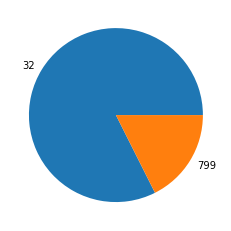

In [17]:
plt.pie(percentages, labels=percentages.index)

In [20]:
from analysis_helpers.intercept_helpers import get_cipher_suite_info, fill_in_table
cipher_info = get_cipher_suite_info(base_df["cipher"].unique())
description = """Securly provides software for K-12 schools including web filtering software
that performs SSL Interception https://www.securly.com/filter
"""
pd.set_option("max_colwidth", None)
fill_in_table(df, cipher_info, description)

,domain,2nd-level domain,On-file leaf issuer,Observed leaf issuer,Observed leaf serial number,Observed issuer information/reference,Weakness/vulnerabilities of interception parameters
0,www.google.com,google,"['Google Trust Services LLC (2022-04-11 - 2022-07-04)', 'Google Trust Services (2017-07-28 - 2017-10-20)', ""Let's Encrypt (2020-01-29 - 2020-04-28)"", 'Google Inc (2009-11-12 - 2010-11-12)', 'Thawte Consulting (Pty) Ltd. (2007-05-03 - 2008-05-14)', '""cPanel, Inc."" (2017-11-01 - 2018-01-30)', 'COMODO CA Limited (2009-02-20 - 2009-05-21)', 'The USERTRUST Network (2011-03-15 - 2014-03-14)', '""thawte, Inc."" (2015-09-14 - 2015-09-15)']",Securly,66E55525E50D2A9F,"""Securly provides software for K-12 schools including web filtering software\nthat performs SSL Interception https://www.securly.com/filter\n",Validity Period: 32 days Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 Cipher Security: secure TLS Version: TLSv12
1,google.com,google,"['DigiNotar (2011-07-10 - 2013-07-09)', 'Google Inc (2007-06-29 - 2008-06-29)', 'Thawte Consulting (Pty) Ltd. (2007-05-03 - 2008-05-15)', 'Thawte Consulting cc (2006-04-04 - 2008-04-03)', 'Equifax (2006-03-01 - 2008-03-01)', 'COMODO CA Limited (2009-02-20 - 2009-05-21)', 'StartCom Ltd. (2013-01-16 - 2014-01-18)']",Securly,D9D7AAA288CFF0B4,"""Securly provides software for K-12 schools including web filtering software\nthat performs SSL Interception https://www.securly.com/filter\n",Validity Period: 32 days Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 Cipher Security: secure TLS Version: TLSv12
2,www.facebook.com,facebook,"['Sectigo Limited (2019-01-31 - 2019-05-01)', ""Let's Encrypt (2021-04-05 - 2021-07-04)"", '""cPanel, Inc."" (2018-03-19 - 2018-06-17)', 'DigiCert Inc (2008-11-18 - 2010-11-22)', 'Equifax Secure Inc. (2007-09-28 - 2010-09-28)', 'VeriSign Trust Network (2011-07-14 - 2012-07-13)']",Securly,1B7001C1AEACC068,"""Securly provides software for K-12 schools including web filtering software\nthat performs SSL Interception https://www.securly.com/filter\n",Validity Period: 32 days Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 Cipher Security: secure TLS Version: TLSv12
3,play.hbomax.com,hbomax,"['Amazon (2022-03-03 - 2023-04-01)', 'GlobalSign nv-sa (2022-03-23 - 2023-04-24)', ""Let's Encrypt (2020-03-26 - 2020-06-24)""]",Securly,8EB6351C6E4357C4,"""Securly provides software for K-12 schools including web filtering software\nthat performs SSL Interception https://www.securly.com/filter\n",Validity Period: 32 days Cipher Suite: TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256 Cipher Security: secure TLS Version: TLSv12
